<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Quiz 2

This notebook contains 5 parts. You are to fill in this quiz with your answers, taking special care to follow the directions _exactly_.

To **submit** your quiz, add it to your submissions folder and submit via Google Classroom as any other assignment.

### Quiz Information:
- This is an "open book" quiz - you may use any resources! This includes Jupyter notebooks, Google, StackOverflow, and your notes. ANY RESOURCE YOU USE MUST BE CITED (comment your code with links, which lesson you got the inspiration from, etc.) and failure to cite resources you use will be considered plagiarism. 
- You may NOT work with anyone else on this quiz (your classmates, your instructor, etc.).
- You will have one hour to take this quiz.

## Part 1: Getting the data
The dataset provided in this repository (`./data/concrete.csv`) consists of various amounts of different components used to create concrete and the concrete's [compressive strength](https://www.aboutcivil.org/compressive-strength-of-concrete.html). A data dictionary for this dataset can be found in the README.

**Read in the data and display the first 5 rows.**

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

In [211]:
concrete = pd.read_csv('./data/concrete.csv')

In [212]:
concrete.head()

,Unnamed: 0,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,2,332.5,142.5,0.0,228.0,NaN,932.0,594.0,270,40.27
3,3,332.5,142.5,0.0,228.0,NaN,932.0,594.0,365,41.05
4,4,198.6,132.4,0.0,192.0,NaN,978.4,825.5,360,44.30


## Part 2: Data Cleaning

There are a few issues with this dataset. To help you identify and fix these issues, you are told:
- The `Unnamed: 0` column should not be a part of this dataset.
- Any null values in this datset are clerical errors. They should all be 0's.
- All columns in this dataset should be numeric.

**Please clean up the dataset.**

In [213]:
concrete.drop(columns='Unnamed: 0', inplace=True)

In [214]:
concrete.isna().sum()

Cement                             0
Blast Furnace Slag                 0
Fly Ash                            0
Water                              0
Superplasticizer                 379
Coarse Aggregate                   0
Fine Aggregate                     0
Age                                0
Concrete compressive strength      0
dtype: int64

In [215]:
concrete.fillna(0, inplace=True)

In [216]:
concrete.isna().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [217]:
# Age should be a float
concrete.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                               object
Concrete compressive strength    float64
dtype: object

In [218]:
concrete['Age'].value_counts()

28      424
3       134
7       126
56       91
14       62
90       54
100      52
180      26
91       22
365      14
270      13
360       6
120       3
1         2
'28'      1
Name: Age, dtype: int64

In [219]:
# Credit from 3.07-lesson-model-workflow
def clean_age(cell):
    if cell == "'28'":
        return 28
    else:
        return float(cell)

In [220]:
# Credit from 3.07-lesson-model-workflow
concrete['Age'] = concrete['Age'].map(clean_age)

In [221]:
concrete.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                              float64
Concrete compressive strength    float64
dtype: object

## Part 3: EDA

You are asked to give the following to the hiring manager:
- Descriptive statistics of the Water column
- A scatterplot of Coarse Aggregate compared to Fine Aggregate colored purple with a title and axis labels

**Please display these.**

In [222]:
concrete['Water'].describe()

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: Water, dtype: float64

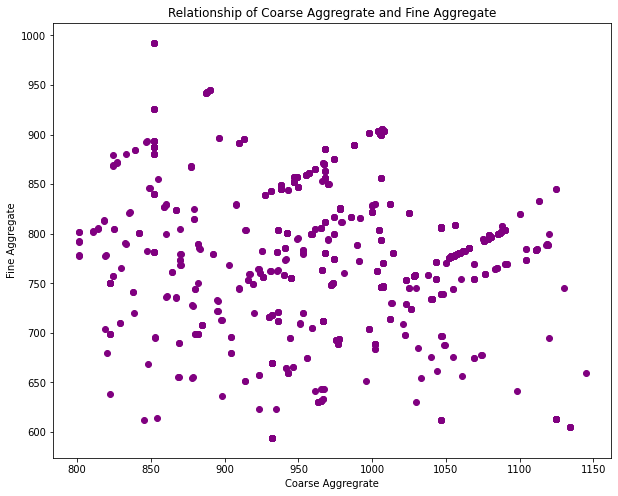

In [223]:
plt.figure(figsize=(10,8))
plt.scatter(concrete['Coarse Aggregate'], concrete['Fine Aggregate'], c='purple');
plt.xlabel('Coarse Aggregrate')
plt.ylabel('Fine Aggregate')
plt.title('Relationship of Coarse Aggregrate and Fine Aggregate');

## Part 4: Modeling

**Fit a linear regression model to predict the concrete compressive strength.** 
* Please use a random state of `2020` when splitting your data
* Use 80% of the dataset for training and the other 20% for testing
* Print out and interpret the testing R<sup>2</sup>.

In [224]:
concrete.head(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99


In [225]:
X = concrete[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Age', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate']]
y = concrete['Concrete compressive strength']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2020, train_size=.80)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

y_pred_train = linreg.predict(X_train)

y_pred_test = linreg.predict(X_test)

In [227]:
print(f"The r2 score for the train data is {metrics.r2_score(y_train, y_pred_train)}")

The r2 score for the train data is 0.6187699710545507


In [228]:
print(f"The r2 score for the test data is {metrics.r2_score(y_test, y_pred_test)}")

The r2 score for the test data is 0.5979187032701263


The r2 score for the train and test data are fairly close to each other. This means that we have a pretty good model. If the two numbers were far apart like train was 91 and test was 35 that would mean that our data has very high variance. If the model was to simple we would have high bias. 

In [235]:
y_null = np.zeros_like(y_train)
y_null += y_train.mean()
y_null[:5]

print(f"The MSE for the train data is {mean_squared_error(y_train, y_pred_train, squared=False)}")
print(f"The MSE for the null model is {mean_squared_error(y_train, y_null, squared=False)}")

The MSE for the train data is 10.405061202866408
The MSE for the null model is 16.85198593764963


As we can see above our model is performing better than if we just took the average.

In [230]:
# Credit to Adi Brohnstein from lesson 3.07-lesson-model-workflow
list(zip(X, linreg.coef_))[0]

('Cement', 0.11671770732637791)

In [231]:
# Credit to Adi Brohnstein from lesson 3.07-lesson-model-workflow
pd.DataFrame(list(zip(X, linreg.coef_)), columns=['Feature', 'Coefficient']).sort_values(
by='Coefficient', ascending=False)

,Feature,Coefficient
5,Superplasticizer,0.258219
0,Cement,0.116718
4,Age,0.111217
1,Blast Furnace Slag,0.099552
2,Fly Ash,0.086012
7,Fine Aggregate,0.014275
6,Coarse Aggregate,0.010311
3,Water,-0.174673


## Part 5: Interpretation

The firm is especially interested in learning more about the effects of [superplasticizer](https://en.wikipedia.org/wiki/Superplasticizer).

**They ask you what effect the Superplasticizer has on the concrete compressive strength. How would you respond? Be as specific as possible.**

As you can see in the figure below this is the relationship between superplasticizer and Concrete compressive strength. There isn't a great linear relationship between these two. When we ran our model only with superplasticizer we got a very low score meaning that superplasticizer does not have a big impact in the the concrete compressive strength. For every one unit increase in the superplasticizer we can expect a .26 increase in the concrete compressive strength.

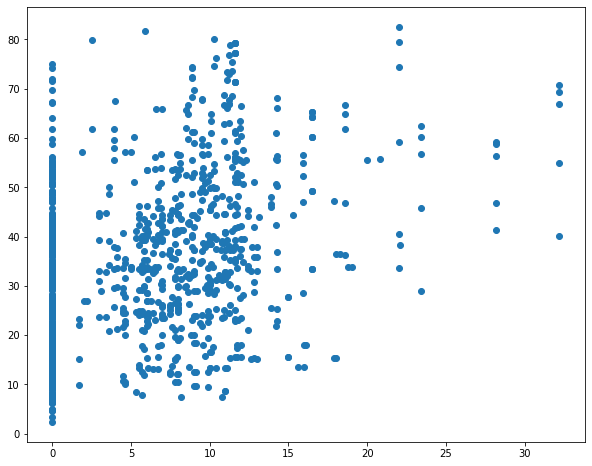

In [232]:
plt.figure(figsize=(10,8))
plt.scatter(concrete['Superplasticizer'], concrete['Concrete compressive strength']);